In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.9/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.12.0


In [ ]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 30.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from tensorflow.python.client import device_lib
import os
import seaborn as sb
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, auc
import sys
import sklearn

%matplotlib inline


In [ ]:
train_dir = '/content/drive/MyDrive/datasets/pneumonia/chest_xray/train'
val_dir = '/content/drive/MyDrive/datasets/pneumonia/chest_xray/val'
test_dir = '/content/drive/MyDrive/datasets/pneumonia/chest_xray/test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
batch_size = 16

train_generator = train_datagen.flow_from_directory(train_dir,
                                             target_size = (80,80),
                                             batch_size = batch_size,
                                             class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (80,80),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size = (80,80),
                                                batch_size = batch_size,
                                                class_mode = 'binary')

Found 5265 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
img_path = os.path.join(train_dir, 'NORMAL', 'IM-0115-0001.jpeg')

# Load the image using imread
img = plt.imread(img_path)

# Check the shape of the image
print('Image shape:', img.shape)

Image shape: (1858, 2090)


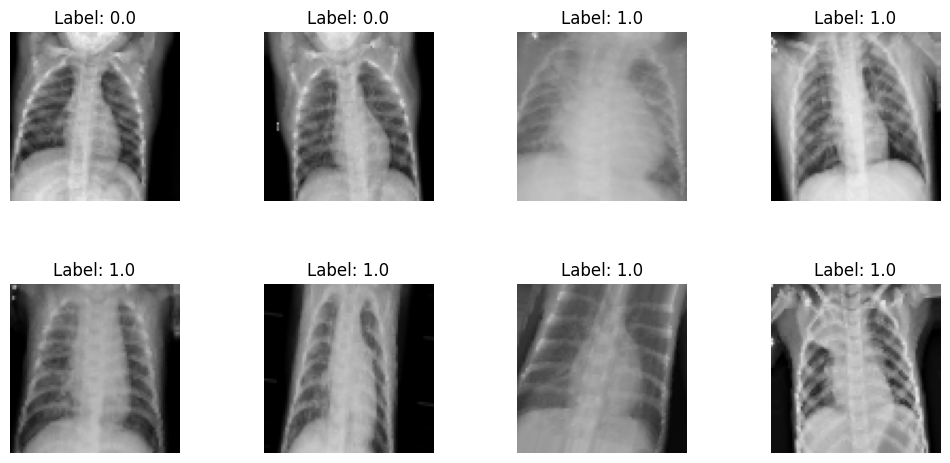

In [ ]:
x_batch, y_batch = next(train_generator)

# Plot the first 8 images from the batch
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for i in range(8):
    axes[i].imshow(x_batch[i])
    axes[i].set_title(f"Label: {y_batch[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()


In [ ]:
model_scratch = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same', kernel_initializer='he_uniform', input_shape=(80,80,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),



    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu',  padding = 'same', kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu',  padding = 'same', kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),



    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu',  padding = 'same', kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu',kernel_regularizer = regularizers.L2(0.01)),
    layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation = 'relu',kernel_regularizer = regularizers.L2(0.01)),
    layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])


In [ ]:
opt = Adam(learning_rate=0.0001)
opt2 = RMSprop(learning_rate=0.0001)
opt3 = SGD(learning_rate=0.0001, momentum=0.9)

In [ ]:
model_scratch.compile(loss = 'binary_crossentropy',
                     optimizer = 'adam',
                     metrics = 'accuracy')

In [ ]:
history = model_scratch.fit(train_generator,
                           epochs = 40,
                           callbacks=EarlyStopping(monitor = 'val_loss', patience=3),
                           validation_data = test_generator)

Epoch 1/40
330/330 [==============================] - 1106s 3s/step - loss: 1.3907 - accuracy: 0.7297 - val_loss: 1.0027 - val_accuracy: 0.6250
Epoch 2/40
330/330 [==============================] - 83s 251ms/step - loss: 0.7620 - accuracy: 0.7388 - val_loss: 0.7317 - val_accuracy: 0.6250
Epoch 3/40
330/330 [==============================] - 83s 252ms/step - loss: 0.5597 - accuracy: 0.7675 - val_loss: 0.6276 - val_accuracy: 0.7067
Epoch 4/40
330/330 [==============================] - 83s 253ms/step - loss: 0.4220 - accuracy: 0.8575 - val_loss: 0.4593 - val_accuracy: 0.8173
Epoch 5/40
330/330 [==============================] - 84s 254ms/step - loss: 0.3606 - accuracy: 0.8792 - val_loss: 0.4089 - val_accuracy: 0.8846
Epoch 6/40
330/330 [==============================] - 84s 254ms/step - loss: 0.3394 - accuracy: 0.8821 - val_loss: 0.3627 - val_accuracy: 0.8702
Epoch 7/40
330/330 [==============================] - 83s 252ms/step - loss: 0.3118 - accuracy: 0.8948 - val_loss: 0.3760 - val_acc

In [ ]:
test_loss, test_acc = model_scratch.evaluate(test_generator)
print('test accuracy', test_acc)

39/39 [==============================] - 8s 199ms/step - loss: 0.3228 - accuracy: 0.9022
test accuracy 0.9022436141967773


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import Xception
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50V2


In [ ]:
fine_tune = 100

In [ ]:
#base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(80, 80, 3))
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(80, 80, 3))
#base_model = Xception(weights='imagenet', include_top=False, input_shape=(80,80,3))
#base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(80, 80, 3))
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(80, 80, 3))


for layer in base_model.layers[:fine_tune]:
    layer.trainable = False



model = Sequential()
model.add(base_model)

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
'''model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))'''

model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss = 'binary_crossentropy',
                     optimizer = opt3,
                     metrics = 'accuracy')

In [ ]:
history_2 = model.fit(train_generator,
                           epochs = 100,
                           callbacks=EarlyStopping(monitor = 'val_loss', patience=2),
                           validation_data = test_generator)

Epoch 1/100
330/330 [==============================] - 90s 274ms/step - loss: 1.5003 - accuracy: 0.9829 - val_loss: 1.7277 - val_accuracy: 0.9407
Epoch 2/100
330/330 [==============================] - 90s 273ms/step - loss: 1.4778 - accuracy: 0.9854 - val_loss: 1.6883 - val_accuracy: 0.9263
Epoch 3/100
330/330 [==============================] - 89s 270ms/step - loss: 1.4539 - accuracy: 0.9861 - val_loss: 1.7222 - val_accuracy: 0.9311
Epoch 4/100
330/330 [==============================] - 92s 279ms/step - loss: 1.4405 - accuracy: 0.9850 - val_loss: 1.6798 - val_accuracy: 0.9311
Epoch 5/100
330/330 [==============================] - 91s 277ms/step - loss: 1.4205 - accuracy: 0.9854 - val_loss: 1.6190 - val_accuracy: 0.9311
Epoch 6/100
330/330 [==============================] - 91s 277ms/step - loss: 1.3954 - accuracy: 0.9877 - val_loss: 1.6387 - val_accuracy: 0.9391
Epoch 7/100
330/330 [==============================] - 89s 270ms/step - loss: 1.3857 - accuracy: 0.9846 - val_loss: 1.6380 -

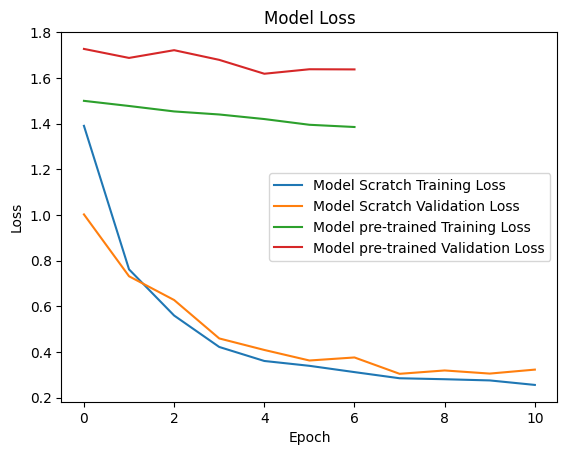

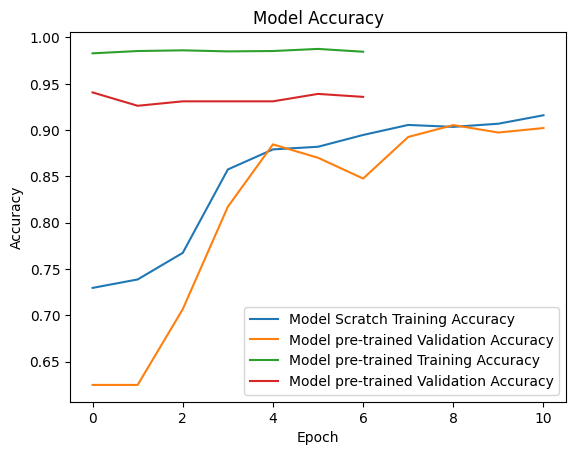

In [ ]:
plt.plot(history.history['loss'], label='Model Scratch Training Loss')
plt.plot(history.history['val_loss'], label='Model Scratch Validation Loss')

plt.plot(history_2.history['loss'], label='Model pre-trained Training Loss')
plt.plot(history_2.history['val_loss'], label='Model pre-trained Validation Loss')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label='Model Scratch Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Model pre-trained Validation Accuracy')

plt.plot(history_2.history['accuracy'], label='Model pre-trained Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Model pre-trained Validation Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
y_pred = model.predict(test_generator).round().astype(int)
y_true = test_generator.labels
classes = test_generator.class_indices.keys()
cm = confusion_matrix(y_true, y_pred)
sb.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Pre-trained')
plt.show()
y_pred_1 = model_scratch.predict(test_generator).round().astype(int)
y_true = test_generator.labels
classes = test_generator.class_indices.keys()
cm_1 = confusion_matrix(y_true, y_pred)
sb.heatmap(cm_1, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Scratch')
plt.show()

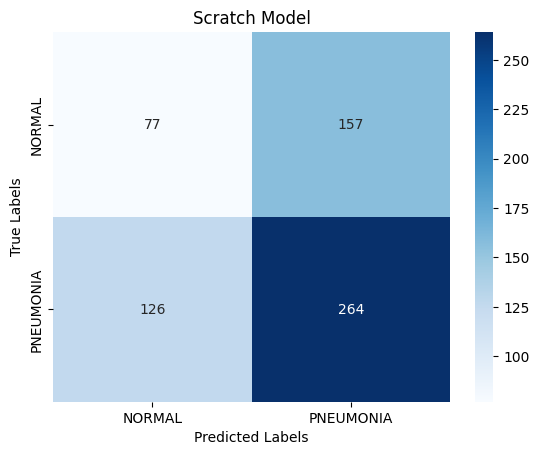

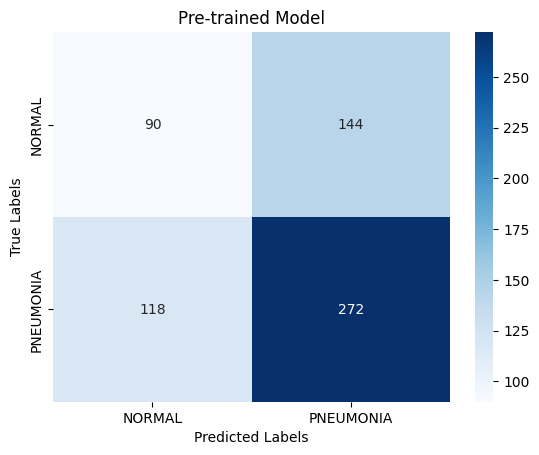

In [ ]:
# Generate predictions using the models
y_pred_1 = model_scratch.predict(test_generator).round().astype(int)
y_pred_2 = model.predict(test_generator).round().astype(int)
y_true = test_generator.labels
classes = test_generator.class_indices.keys()

# Compute confusion matrices
cm_1 = confusion_matrix(y_true, y_pred_1)
cm_2 = confusion_matrix(y_true, y_pred_2)
# Plot confusion matrix 1
sb.heatmap(cm_1, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Scratch Model')
plt.show()

# Plot confusion matrix 2
sb.heatmap(cm_2, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Pre-trained Model')
plt.show()


In [ ]:
train_pred_1 = model_scratch.predict(train_generator)
train_pred_labels_1 = np.round(train_pred_1)

train_true_labels = train_generator.labels

print("Classification report for train_generator:\n")
print(classification_report(train_true_labels, train_pred_labels_1))

train_roc_auc = roc_auc_score(train_true_labels, train_pred_1)
print("ROC AUC score for train_generator:", train_roc_auc)

train_fpr_1, train_tpr_1, _ = roc_curve(train_true_labels, train_pred_1)

test_pred_1 = model_scratch.predict(test_generator)
test_pred_labels_1 = np.round(test_pred_1)

test_true_labels = test_generator.labels

print("\nClassification report for test_generator:\n")
print(classification_report(test_true_labels, test_pred_labels_1))

test_roc_auc = roc_auc_score(test_true_labels, test_pred_1)
print("ROC AUC score for test_generator:", test_roc_auc)

test_fp_1r, test_tpr_1, _ = roc_curve(test_true_labels, test_pred_1)


Classification report for train_generator:

              precision    recall  f1-score   support

           0       0.26      0.28      0.27      1370
           1       0.74      0.72      0.73      3895

    accuracy                           0.61      5265
   macro avg       0.50      0.50      0.50      5265
weighted avg       0.62      0.61      0.61      5265

ROC AUC score for train_generator: 0.4971712751703007

Classification report for test_generator:

              precision    recall  f1-score   support

           0       0.36      0.32      0.34       234
           1       0.62      0.67      0.64       390

    accuracy                           0.54       624
   macro avg       0.49      0.49      0.49       624
weighted avg       0.52      0.54      0.53       624

ROC AUC score for test_generator: 0.49209401709401707


In [ ]:
train_pred_2 = model.predict(train_generator)
train_pred_labels_2 = np.round(train_pred_2)

train_true_labels = train_generator.labels

print("Classification report for train_generator:\n")
print(classification_report(train_true_labels, train_pred_labels_2))

train_roc_auc = roc_auc_score(train_true_labels, train_pred_2)
print("ROC AUC score for train_generator:", train_roc_auc)

train_fpr_2, train_tpr_2, _ = roc_curve(train_true_labels, train_pred_2)

test_pred_2 = model.predict(test_generator)
test_pred_labels_2 = np.round(test_pred_2)

test_true_labels = test_generator.labels

print("\nClassification report for test_generator:\n")
print(classification_report(test_true_labels, test_pred_labels_2))

test_roc_auc_2 = roc_auc_score(test_true_labels, test_pred_2)
print("ROC AUC score for test_generator:", test_roc_auc_2)

test_fp_2r, test_tpr_2, _ = roc_curve(test_true_labels, test_pred_2)


Classification report for train_generator:

              precision    recall  f1-score   support

           0       0.26      0.26      0.26      1370
           1       0.74      0.74      0.74      3895

    accuracy                           0.62      5265
   macro avg       0.50      0.50      0.50      5265
weighted avg       0.62      0.62      0.62      5265

ROC AUC score for train_generator: 0.4951087394469796

Classification report for test_generator:

              precision    recall  f1-score   support

           0       0.38      0.33      0.35       234
           1       0.62      0.67      0.65       390

    accuracy                           0.54       624
   macro avg       0.50      0.50      0.50       624
weighted avg       0.53      0.54      0.54       624

ROC AUC score for test_generator: 0.49088866973482365
